In [59]:
import pandas as pd
import numpy as np
raw_mail_data=pd.read_csv('/content/mail_data.csv')

In [60]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
raw_mail_data.shape

(5572, 2)

In [62]:
raw_mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [63]:
raw_mail_data.isna().sum()

Category    0
Message     0
dtype: int64

In [64]:
dic={'spam':1,'ham':0}
raw_mail_data['Category']=raw_mail_data['Category'].map(dic)

In [65]:
raw_mail_data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category', ylabel='count'>

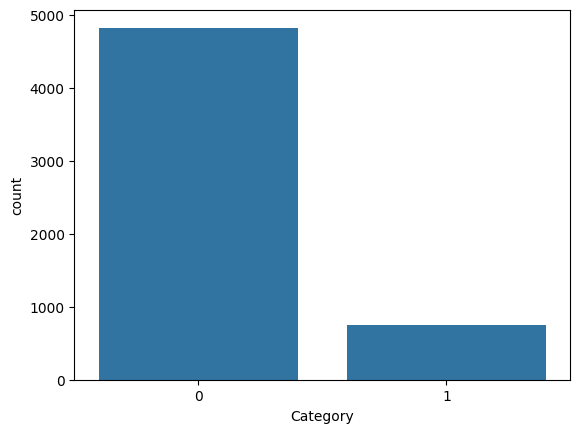

In [66]:
import seaborn as sns
sns.countplot(x='Category',data=raw_mail_data)

In [67]:
X=raw_mail_data['Message']
Y=raw_mail_data['Category']

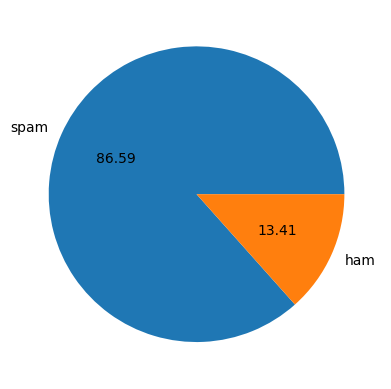

In [68]:
import matplotlib.pyplot as plt
plt.pie(raw_mail_data['Category'].value_counts(),labels=['spam','ham'],autopct='%0.2f')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [73]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

### Example of CountVectorizer

In [74]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the model and transform the corpus into a document-term matrix
X = vectorizer.fit_transform(corpus)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the document-term matrix to an array for better visualization
X_array = X.toarray()

# Display the results
print("Feature Names:", feature_names)
print("Document-Term Matrix:\n", X_array)


Feature Names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Document-Term Matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### using countvectorizer

## Feature Extraction

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_features = vectorizer.transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_features.toarray(), Y_train)

GaussianNB()

In [77]:
# predictions
y_pred= model.predict(X_test_features.toarray())

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9049327354260089


In [79]:
cm=confusion_matrix(Y_test,y_pred)

In [80]:
cm

array([[864,  96],
       [ 10, 145]])

In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       960
           1       0.60      0.94      0.73       155

    accuracy                           0.90      1115
   macro avg       0.80      0.92      0.84      1115
weighted avg       0.93      0.90      0.91      1115



In [95]:
# prediction on test data

prediction_on_test_data1 = model.predict(X_test_features.toarray())
accuracy_on_test_data1 = accuracy_score(Y_test, prediction_on_test_data1)
print('Accuracy on test data : ', accuracy_on_test_data1)

Accuracy on test data :  0.905829596412556


# **With TfidfVectorizer**

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [83]:
X_train_features2= vectorizer.fit_transform(X_train)
X_test_features2= vectorizer.transform(X_test)

In [84]:
model2= GaussianNB()
model2.fit(X_train_features2.toarray(),Y_train)

GaussianNB()

In [85]:
# predictions
y_pred2= model2.predict(X_test_features2.toarray())

In [86]:
accuracy2=accuracy_score(y_pred2,Y_test)
print("Accuracy:",accuracy2)

Accuracy: 0.9013452914798207


In [96]:
# prediction on test data

prediction_on_test_data2= model.predict(X_test_features2.toarray())
accuracy_on_test_data2 = accuracy_score(Y_test, prediction_on_test_data2)
print('Accuracy on test data : ', accuracy_on_test_data2)

Accuracy on test data :  0.9013452914798207


# Using logistic regression

In [87]:
model3= LogisticRegression()

In [89]:
model.fit(X_train_features2.toarray(), Y_train)

GaussianNB()

In [91]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features2.toarray())
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [92]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9452546555979359


In [94]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features2.toarray())
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9013452914798207
